In [184]:
#Import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import joblib





In [185]:
#Load the dataset
df=pd.read_csv('StudentsPerformance.csv')

In [186]:
#View the first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [187]:
#Dataset shape (rows, columns)
#df.shape
print(df.shape)

(1000, 8)


In [188]:
 #View basic info (column names, data types, non-null counts)
print("Dataset info: ")
print(df.info())

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [189]:
#cheak for missing values
#df.isnull().sum()
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [190]:
# Create a new column for average score
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3



In [191]:
# Check the first few rows
print(df[['math score', 'reading score', 'writing score', 'average_score']].head())

   math score  reading score  writing score  average_score
0          72             72             74      72.666667
1          69             90             88      82.333333
2          90             95             93      92.666667
3          47             57             44      49.333333
4          76             78             75      76.333333


In [192]:
# Check the last few rows
print(df[['math score', 'reading score', 'writing score', 'average_score']].tail())

     math score  reading score  writing score  average_score
995          88             99             95      94.000000
996          62             55             55      57.333333
997          59             71             65      65.000000
998          68             78             77      74.333333
999          77             86             86      83.000000


In [193]:
#Convert Categorical Text to Numbers (Label Encoding)

#gender: female=0, male=1

# Encode gender

#df['gender'] = df['gender'].map({'female': 0, 'male': 1})







In [194]:
#lunch: standard =1, free/reduced = 0
#encode lunch

#df['lunch'] = df['lunch'].map({'free/reduced': 0, 'standard': 1})



In [195]:
#test preparation course: none=0, completed=1
# Encode test preparation course

#df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

In [196]:
# Clean text: remove spaces and make lowercase
df['gender'] = df['gender'].str.strip().str.lower()
df['lunch'] = df['lunch'].str.strip().str.lower()
df['test preparation course'] = df['test preparation course'].str.strip().str.lower()

# Then do mapping safely
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['lunch'] = df['lunch'].map({'free/reduced': 0, 'standard': 1})
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})


In [197]:
print(df[['gender', 'lunch', 'test preparation course']].head())


   gender  lunch  test preparation course
0       0      1                        0
1       0      1                        1
2       0      1                        0
3       1      0                        0
4       1      1                        0


In [198]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,72.666667
1,0,group C,some college,1,1,69,90,88,82.333333
2,0,group B,master's degree,1,0,90,95,93,92.666667
3,1,group A,associate's degree,0,0,47,57,44,49.333333
4,1,group C,some college,1,0,76,78,75,76.333333


In [199]:
#Drop Columns (Optional for Simplicity)
df.drop(['race/ethnicity', 'parental level of education'], axis=1, inplace=True)


In [200]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,72,72,74,72.666667
1,0,1,1,69,90,88,82.333333
2,0,1,0,90,95,93,92.666667
3,1,0,0,47,57,44,49.333333
4,1,1,0,76,78,75,76.333333


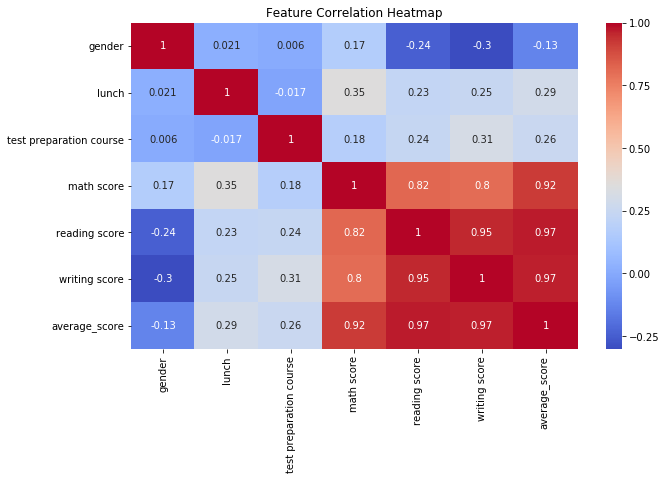

In [201]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


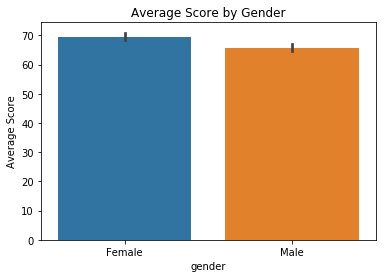

In [202]:
# Plot average score by gender
sns.barplot(x='gender', y='average_score', data=df)
plt.xticks([0,1], ['Female', 'Male'])
plt.title("Average Score by Gender")
plt.ylabel("Average Score")
plt.show()


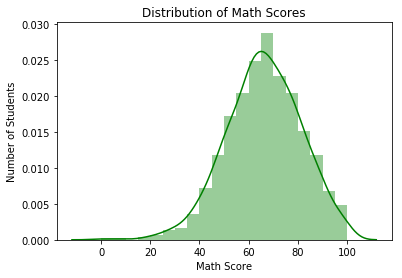

In [203]:
sns.distplot(df['math score'], bins=20, kde=True, color='green')
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.show()

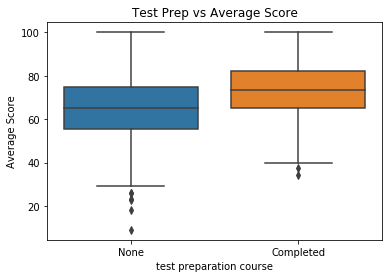

In [204]:
# Compare scores for students who completed test prep vs not
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.xticks([0, 1], ['None', 'Completed'])
plt.title("Test Prep vs Average Score")
plt.ylabel("Average Score")
plt.show()


In [205]:
# Create pass/fail column based on average score
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 60 else 0)

In [206]:
 #Check if it worked
#print(df[['average_score', 'result']].head(10))
df[['average_score', 'result']].head(10)


,average_score,result
0,72.666667,1
1,82.333333,1
2,92.666667,1
3,49.333333,0
4,76.333333,1
5,77.333333,1
6,91.666667,1
7,40.666667,0
8,65.000000,1
9,49.333333,0


In [207]:
# Select features (X) and target (y)
X = df[['gender', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]
y = df['result']

In [208]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
#Train a Logistic Regression Model
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy of the model:", round(accuracy * 100, 2), "%")

# Detailed report
print(" Classification Report:")
print(classification_report(y_test, y_pred))


 Accuracy of the model: 96.0 %
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        62
           1       0.95      1.00      0.97       138

   micro avg       0.96      0.96      0.96       200
   macro avg       0.97      0.94      0.95       200
weighted avg       0.96      0.96      0.96       200



In [211]:
#random forest model
#from sklearn.ensemble import RandomForestClassifier
# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [212]:
# Train it
rf_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [213]:

# Predict
rf_pred = rf_model.predict(X_test)


In [214]:
# Evaluate
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")


# Classification Report
print("\n Random Forest Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 99.0 %

 Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.99      0.99       138

   micro avg       0.99      0.99      0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



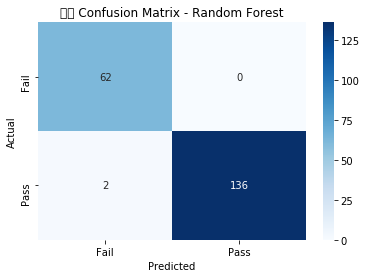

In [215]:

# Create confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('📊 Confusion Matrix - Random Forest')
plt.show()


In [219]:
# Save the Model 
#Save your trained model as a .pkl file so you can use it later in apps or projects.
#import joblib
joblib.dump(rf_model, 'student_pass_model.pkl')
print(" Model saved as student_pass_model.pkl")


 Model saved as student_pass_model.pkl
